In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv('flights.csv')
print(df.columns)
df=df.head(1000)


Index(['flight', 'time', 'wind_speed', 'wind_angle', 'battery_voltage',
       'battery_current', 'position_x', 'position_y', 'position_z',
       'orientation_x', 'orientation_y', 'orientation_z', 'orientation_w',
       'velocity_x', 'velocity_y', 'velocity_z', 'angular_x', 'angular_y',
       'angular_z', 'linear_acceleration_x', 'linear_acceleration_y',
       'linear_acceleration_z', 'speed', 'payload', 'altitude', 'date',
       'time_day', 'route'],
      dtype='object')


J:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


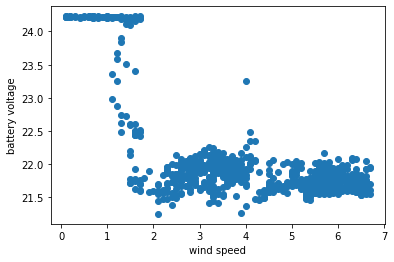

In [2]:
%matplotlib inline
plt.xlabel('wind speed')
plt.ylabel('battery voltage')
plt.scatter(df.wind_speed,df.battery_voltage)

In [3]:
reg = linear_model.LinearRegression()
reg.fit(df[['wind_speed']], df.battery_voltage)

LinearRegression()

In [4]:
reg.predict(np.array([11]).reshape(1,1))

array([19.92047764])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [7]:
df.head


<bound method NDFrame.head of      flight   time  wind_speed  wind_angle  battery_voltage  battery_current  \
0         1    0.0         0.1        12.0        24.222174         0.087470   
1         1    0.2         0.1         3.0        24.227180         0.095421   
2         1    0.3         0.1       352.0        24.225929         0.095421   
3         1    0.5         0.1       354.0        24.224678         0.095421   
4         1    0.6         0.1       359.0        24.210905         0.079518   
..      ...    ...         ...         ...              ...              ...   
995       1  149.2         6.5       202.0        21.532768        22.296774   
996       1  149.4         6.4       204.0        21.575338        20.984732   
997       1  149.5         6.4       205.0        21.659225        19.958952   
998       1  149.7         6.3       206.0        21.629175        21.382320   
999       1  149.9         6.3       206.0        21.625420        20.412203   

     posi

In [20]:
X = df.drop(['wind_speed', 'date', 'altitude', 'time_day', 'route'], axis=1)
Y = df['wind_speed']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [16]:
#from sklearn import preprocessing

#lab_enc = preprocessing.LabelEncoder()
#Y_train_encoded = lab_enc.fit_transform(Y_train)
#Y_test_encoded = lab_enc.fit_transform(Y_test)

In [21]:
clf = SVC(kernel='linear')
clf.fit(X_train, Y_train.astype('int'))

SVC(kernel='linear')

In [22]:
Y_pred = clf.predict(X_test)

In [23]:
print(classification_report(Y_test.astype('int'), Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.95      0.97      0.96        37
           2       0.72      0.62      0.67        34
           3       0.77      0.86      0.81        65
           4       0.80      0.50      0.62        16
           5       0.83      0.86      0.85        80
           6       0.80      0.79      0.80        52

    accuracy                           0.82       300
   macro avg       0.83      0.79      0.80       300
weighted avg       0.82      0.82      0.82       300

